In [1]:
from routing import TaxiRouting, create_dataframes
import pandas as pd
from bokeh.io import output_notebook
import networkx as nx
import numpy as np
from time import time
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.tile_providers import get_provider, Vendors
from bokeh.models import (GraphRenderer, Circle, MultiLine, StaticLayoutProvider,
                          HoverTool, TapTool, EdgesAndLinkedNodes, NodesAndLinkedEdges,
                          ColumnDataSource, LabelSet, NodesOnly
                         )
output_notebook()

Loading BokehJS ...

In [2]:
# start, end, start_time, trip_time, value
trips = [(2,1,1,2,1),
         (0,1,0,1,1),
         (0,1,2,1,1)]
# start, end, trip_time
arcs = []
L = 3
trips, nodes, arcs = create_dataframes(trips, arcs, L)
small_ex = TaxiRouting(trips, nodes, arcs, 0, 3, 2)

2


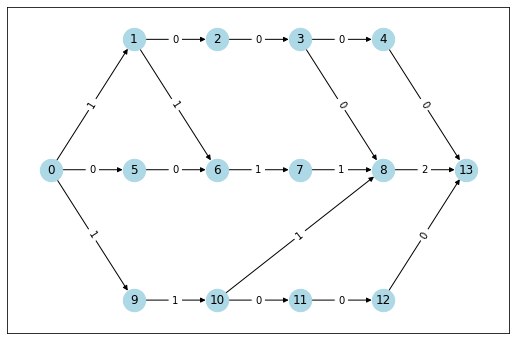

In [3]:
small_ex.optimize()
print(small_ex.objective)
small_ex.draw_graph()

In [4]:
trips = pd.read_csv('data/2013-09-01_trip_data_manhattan.csv').drop(columns='id')
trips['value'] = 2.50 + 1.56*trips.trip_distance + 0.50*trips.trip_time
trips.value = trips.value.apply(lambda x: int(round(x,2)*100))
nodes = pd.read_csv('data/nyc_nodes_manhattan.csv').drop(columns='Unnamed: 0')
arcs = pd.read_csv('data/nyc_links_manhattan.csv').drop(columns='Unnamed: 0')

In [5]:
nyc_taxi = TaxiRouting(trips, nodes, arcs, 1020, 1140, 2000)

In [6]:
nyc_taxi.optimize()
print(nyc_taxi.objective/100)
print(sum(nyc_taxi.trips_df.value)/100)

167431.17
168598.57


In [8]:
nyc_taxi.get_stats()

Summary Statistics
Avg. Moving Pct.:  0.8332416666666685
Avg. On Trip Pct.:  0.5554166666666674
Avg. Total Distance of Trips:  21.54055723809996
Total Passengers:  24649
Avg. Revenue:  83.71558499999999


In [13]:
nyc_taxi.taxi_stats[5]

{'moving_pct': 0.7166666666666667,
 'on_trip_pct': 0.5,
 'num_trips': 6,
 'total_trip_distance': 17.4935258,
 'total_passengers': 9,
 'revenue': 72.3}

In [14]:
nyc_taxi.plot_taxi_route([5])